#  SQL Queries 01

For more SQL examples in the SQLite3 dialect, seee [SQLite3 tutorial](https://www.techonthenet.com/sqlite/index.php). 

For a deep dive, see [SQL Queries for Mere Mortals](https://www.amazon.com/SQL-Queries-Mere-Mortals-Hands/dp/0134858336/ref=dp_ob_title_bk).

## Creating SQLite3 database from pandas

In [1]:
from sklearn.datasets import load_iris

In [2]:
df = load_iris(as_frame=True)['data']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Oracle, SQL server, PostgreSQL, MySQL

In [3]:
import sqlite3
import pandas as pd

In [4]:
con = sqlite3.connect('data/iris.db')

In [5]:
df.to_sql('iris', con, index=True, if_exists='replace')

150

- SQL is a DECLARATIVE language — say what you want
- Most programming lanuguages PROCEDURAL - say how to do it

In [7]:
pd.read_sql(
    """
    SELECT * FROM iris LIMIT 5
    """, con
    )

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [8]:
con.close()

## Data

In [9]:
%load_ext sql

In [10]:
%sql sqlite:///data/faculty.db

Connecting to 'sqlite:///data/faculty.db'

In [11]:
from eralchemy2 import render_er

In [12]:
render_er('sqlite:///data/faculty.db', 'faculty_db.png')

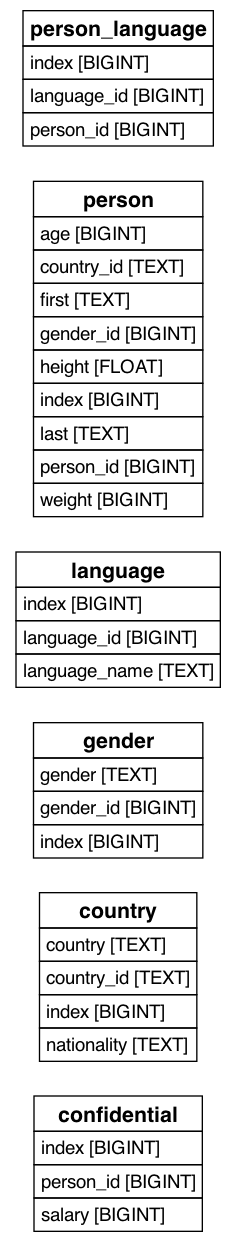

In [13]:
from IPython.display import Image
Image('faculty_db.png')

In [14]:
%%sql

SELECT * FROM sqlite_master WHERE type='table';

Running query in 'sqlite:///data/faculty.db'

type,name,tbl_name,rootpage,sql
table,person,person,2,"CREATE TABLE person ( ""index"" BIGINT, person_id BIGINT, first TEXT, last TEXT, age BIGINT, height FLOAT, weight BIGINT, country_id TEXT, gender_id BIGINT)"
table,confidential,confidential,18,"CREATE TABLE confidential ( ""index"" BIGINT, person_id BIGINT, salary BIGINT)"
table,person_language,person_language,33,"CREATE TABLE person_language ( ""index"" BIGINT, person_id BIGINT, language_id BIGINT)"
table,language,language,50,"CREATE TABLE language ( ""index"" BIGINT, language_id BIGINT, language_name TEXT)"
table,gender,gender,55,"CREATE TABLE gender ( ""index"" BIGINT, gender_id BIGINT, gender TEXT)"
table,country,country,57,"CREATE TABLE country ( ""index"" BIGINT, country_id TEXT, country TEXT, nationality TEXT)"


Note: You can save results as a variable

In [15]:
%%sql master <<

SELECT * FROM sqlite_master WHERE type='table'

Running query in 'sqlite:///data/faculty.db'

In [17]:
type(master)

sql.run.resultset.ResultSet

In [16]:
master.DataFrame()

,type,name,tbl_name,rootpage,sql
0,table,person,person,2,"CREATE TABLE person (\n\t""index"" BIGINT, \n\tp..."
1,table,confidential,confidential,18,"CREATE TABLE confidential (\n\t""index"" BIGINT,..."
2,table,person_language,person_language,33,"CREATE TABLE person_language (\n\t""index"" BIGI..."
3,table,language,language,50,"CREATE TABLE language (\n\t""index"" BIGINT, \n\..."
4,table,gender,gender,55,"CREATE TABLE gender (\n\t""index"" BIGINT, \n\tg..."
5,table,country,country,57,"CREATE TABLE country (\n\t""index"" BIGINT, \n\t..."


## Basic Structure

In [38]:
%%sql

SELECT first, last, age
FROM PERSON
WHERE age < 30
ORDER BY age DESC
LIMIT 5

Running query in 'sqlite:///data/faculty.db'

first,last,age
Arlen,Frederick,29
Brett,Bentley,29
Darius,England,29
Genaro,Dominguez,29
Leo,Hamilton,29


```SQL
SELECT DISTINCT value_expression AS alias
FROM tables AS alias
WHERE predicate
ORDER BY value_expression
```

### Types

- Character (Fixed width, variable width)
- National Character (Fixed width, variable width)
- Binary
- Numeric (Exact, Arpproximate)
- Boolean
- DateTime
- Interval

**CHAR** and **NCHAR** are vendor-dependent. Sometimes they mean the same thing, and sometimes CHAR means bytes and NCHAR means Unicode.

The SQL standard specifies that character strings and datetime literals are enclosed by single quotes. Two single quotes wihtin a string is intepreted as a literal single quote.

```sql
'Gilligan''s island'
```

#### The CAST function

```sql
CAST(X as CHARACTER(10))
```

### Value expression

- Literal
- Column reference
- Function
- CASES
- (Value expression)

which may be prefixed with unary operators `-` and `+` and combined with binary operators appropriate for the data type.

Literal

In [39]:
%sql SELECT 23

Running query in 'sqlite:///data/faculty.db'

23
23


Column reference

In [40]:
%sql SELECT first, last FROM person LIMIT 3

Running query in 'sqlite:///data/faculty.db'

first,last
Aaron,Alexander
Aaron,Kirby
Abram,Allen


Function

In [41]:
%sql SELECT count(*) FROM person

Running query in 'sqlite:///data/faculty.db'

count(*)
1523


Cases

In [42]:
%%sql

SELECT first, last, age,
CASE
    WHEN age < 50 THEN 'Whippernapper'
    WHEN age < 70 THEN 'Old codger'
    ELSE 'Dinosaur'
END comment
FROM person
LIMIT 4

Running query in 'sqlite:///data/faculty.db'

first,last,age,comment
Aaron,Alexander,54,Old codger
Aaron,Kirby,59,Old codger
Abram,Allen,41,Whippernapper
Abram,Boyer,45,Whippernapper


Value expression

In [43]:
%%sql

SELECT first || ' ' || last AS name, age, age - 10 AS fake_age
FROM person
LIMIT 3

Running query in 'sqlite:///data/faculty.db'

name,age,fake_age
Aaron Alexander,54,44
Aaron Kirby,59,49
Abram Allen,41,31


### Bineary operators

#### Concatenation

```SQL
A || B
```

#### Mathematical

```SQL
A + B
A - B
A * B
A / B
```

#### Data and time arithmetic

```SQL
'2018-08-29' + 3
'11:59' + '00:01'
```

In [44]:
%%sql

SELECT DISTINCT language_name
FROM language
LIMIT 5;

Running query in 'sqlite:///data/faculty.db'

language_name
PHP
Clojure
Dylan
GNU Octave
D


### Sorting

```SQL
SELECT DISTINCT value_expression AS alias
FROM tables AS alias
ORDER BY value_expression
```

In [45]:
%%sql

SELECT DISTINCT language_name
FROM language
ORDER BY language_name ASC
LIMIT 5;

Running query in 'sqlite:///data/faculty.db'

language_name
ASP
Assembly
AutoIt
Awk
Bash


In [46]:
%%sql

SELECT DISTINCT language_name
FROM language
ORDER BY random()
LIMIT 5;

Running query in 'sqlite:///data/faculty.db'

language_name
Ruby
D
Elixir
JavaScript
TypeScript


### Filtering

For efficiency, place the most stringent filters first.

```SQL
SELECT DISTINCT value_expression AS alias
FROM tables AS alias
WHERE predicate
ORDER BY value_expression
```

#### Predicates for filtering rows

- Comparison operators (=, <>, <, >, <=, >=)
- BETWEEN start AND end
- IN(A, B, C)
- LIKE
- IS NULL
- REGEX

Use NOT prefix for negation

#### Combining predicates

```sql
AND
OR
```

USe parenthesis to indicate order of evaluation for compound statements.

In [47]:
%%sql

SELECT first, last, age
FROM person
WHERE age BETWEEN 16 AND 17
LIMIT 5;

Running query in 'sqlite:///data/faculty.db'

first,last,age
Antoine,Beard,16
Augustine,Mejia,16
Boris,Mejia,16
Brain,Haney,16
Burl,Mayo,17


### Joins

Joins combine data from 1 or more tables to form a new result set.

Note: To join on multiple columns just use `AND` in the `ON` expression

#### Natural join

Uses all common columns in Tables 1 and 2 for JOIN

```SQL
FROM Table1 
NATURAL INNER JOIN Table 2
```

#### Inner join

General form of INNER JOIN uisng ON

```SQL
FROM Table1 
INNER JOIN Table2
ON Table1.Column = Table2.Column
```

**Note**: This is equivalent to an EQUIJOIN but more flexible in that additional JOIN conditions can be specified.

```SQL
SELECT * 
FROM Table1, Table2
WHERE Table1.Column = Table2.Column
```

If there is a common column in both tables

```SQL
FROM Table1
INNER JOIN Table2
USING Column
```

Joining more than two tables

```SQL
From (Table1 
      INNER JOIN Table2
      ON Table1.column1 = Table2.Column1)
      INNER JOIN Table3 
      ON Table3.column2 = Table2.Column2
```

#### Outer join

General form of OUTER JOIN uisng ON

```SQL
FROM Table1 
RIGHT OUTER JOIN Table2
ON Table1.Column = Table2.Column
```

```SQL
FROM Table1 
LEFT OUTER JOIN Table2
ON Table1.Column = Table2.Column
```

```SQL
FROM Table1 
FULL OUTER JOIN Table2
ON Table1.Column = Table2.Column
```

In [48]:
%%sql

SELECT first, last, language_name 
FROM person
INNER JOIN person_language 
    ON person.person_id = person_language.person_id
INNER JOIN language 
    ON language.language_id = person_language.language_id
LIMIT 10;

Running query in 'sqlite:///data/faculty.db'

first,last,language_name
Aaron,Alexander,Haskell
Aaron,Kirby,GNU Octave
Aaron,Kirby,haXe
Aaron,Kirby,Falcon
Abram,Allen,TypeScript
Abram,Boyer,Io
Abram,Boyer,Lua
Abram,Boyer,Falcon
Adan,Brown,F#
Adolph,Dalton,Dart


### Set operations 

```SQL
SELECT a, b 
FROM table1
SetOp
SELECT a, b 
FROM table2
```

wehre SetOp is `INTERSECT`, `EXCEPT`, `UNION` or `UNION ALL`.

#### Intersection

```sql
INTERSECT
```

Alternative using `INNER JOIN`

#### Union

```SQL
UNION
UNION ALL (does not eliminate duplicate rows)
```

#### Difference

```SQL
EXCEPT
```

Alternative using `OUTER JOIN` with test for `NULL`

In [49]:
%%sql

DROP VIEW IF EXISTS language_view;
CREATE VIEW language_view AS
SELECT first, last, language_name 
FROM person
INNER JOIN person_language 
    ON person.person_id = person_language.person_id
INNER JOIN language 
    ON language.language_id = person_language.language_id
;

Running query in 'sqlite:///data/faculty.db'

++
||
++
++

In [50]:
%%sql

SELECT * 
FROM language_view 
LIMIT 10;

Running query in 'sqlite:///data/faculty.db'

first,last,language_name
Aaron,Alexander,Haskell
Aaron,Kirby,GNU Octave
Aaron,Kirby,haXe
Aaron,Kirby,Falcon
Abram,Allen,TypeScript
Abram,Boyer,Io
Abram,Boyer,Lua
Abram,Boyer,Falcon
Adan,Brown,F#
Adolph,Dalton,Dart


In [52]:
%%sql

SELECT * 
FROM language_view 
WHERE language_name = 'Python'
LIMIT 5

Running query in 'sqlite:///data/faculty.db'

first,last,language_name
Arlie,Terrell,Python
Frankie,Robertson,Python
Gilbert,Byrd,Python
Gilberto,Hampton,Python
Glen,Hawkins,Python


In [57]:
%%sql

SELECT * 
FROM language_view 
WHERE language_name = 'Haskell'
LIMIT 5;

Running query in 'sqlite:///data/faculty.db'

first,last,language_name
Aaron,Alexander,Haskell
Boyd,Blackwell,Haskell
Buck,Howe,Haskell
Carlton,Richard,Haskell
Dorian,Lloyd,Haskell


In [58]:
%%sql

SELECT * 
FROM language_view 
WHERE language_name = 'Python'
UNION
SELECT * 
FROM language_view 
WHERE language_name = 'Haskell'
LIMIT 10;

Running query in 'sqlite:///data/faculty.db'

first,last,language_name
Aaron,Alexander,Haskell
Andree,Douglas,Haskell
Arlie,Terrell,Python
Boyd,Blackwell,Haskell
Buck,Howe,Haskell
Carlton,Richard,Haskell
Carylon,Zamora,Python
Clarisa,Rodgers,Python
Dinorah,O'brien,Haskell
Dorian,Lloyd,Haskell


In [59]:
%%sql

SELECT * 
FROM language_view 
WHERE language_name IN ('Python', 'Haskell')
ORDER BY first
LIMIT 10;

Running query in 'sqlite:///data/faculty.db'

first,last,language_name
Aaron,Alexander,Haskell
Andree,Douglas,Haskell
Arlie,Terrell,Python
Boyd,Blackwell,Haskell
Buck,Howe,Haskell
Carlton,Richard,Haskell
Carylon,Zamora,Python
Clarisa,Rodgers,Python
Dinorah,O'brien,Haskell
Dorian,Lloyd,Haskell


### Aggregate functions

```SQL
COUNT
MIN
MAX
AVG
SUM
```

In [60]:
%%sql

SELECT count(language_name) 
FROM language_view;

Running query in 'sqlite:///data/faculty.db'

count(language_name)
2297


### Grouping

```SQL
SELECT a, MIN(b) AS min_b, MAX(b) AS max_b, AVG(b) AS mean_b
FROM table
GROUP BY a
HAVING mean_b > 5
```

The `HAVING` is analagous to the `WHERE` clause, but filters on aggregate conditions. Note that the `WHERE` statement filters rows BEFORE the grouping is done.

Note: Any variable in the SELECT part that is not an aggregte function needs to be in the GROUP BY part.

```SQL
SELECT a, b, c, COUNT(d)
FROM table
GROUP BY a, b, c
```

In [61]:
%%sql

SELECT language_name, count(*) AS n
FROM language_view
GROUP BY language_name
HAVING n > 45;

Running query in 'sqlite:///data/faculty.db'

language_name,n
AutoIt,61
Bash,48
ECMAScript,48
GNU Octave,49
JavaScript,48
Perl,55
PowerShell,50
Prolog,50


### The CASE switch

#### Simple CASE

Only for equality

```SQL
SELECT name,
(CASE sex 
 WHEN 'M' THEN 1.5*dose
 WHEN 'F' THEN dose
 END) as adjusted_dose
FROM table
```

#### Searched CASE

Any Boolean expression

```SQL
SELECT name,
(CASE  
 WHEN sex = 'M' THEN 1.5*dose
 WHEN sex = 'F' THEN dose
 END) as adjusted_dose
FROM table
```

In [62]:
%%sql

SELECT first, last, language_name,
(CASE
    WHEN language_name LIKE 'H%' THEN 'Hire'
    ELSE 'FIRE'
END
) AS outcome
FROM language_view
LIMIT 10;

Running query in 'sqlite:///data/faculty.db'

first,last,language_name,outcome
Aaron,Alexander,Haskell,Hire
Aaron,Kirby,GNU Octave,FIRE
Aaron,Kirby,haXe,Hire
Aaron,Kirby,Falcon,FIRE
Abram,Allen,TypeScript,FIRE
Abram,Boyer,Io,FIRE
Abram,Boyer,Lua,FIRE
Abram,Boyer,Falcon,FIRE
Adan,Brown,F#,FIRE
Adolph,Dalton,Dart,FIRE


## User defined functions (UDF)

In [63]:
import sqlite3

In [64]:
import random
import statistics

In [65]:
con = sqlite3.connect(":memory:")

#### Row functions

In [66]:
con.create_function("double", 1, lambda x: x*2)

In [67]:
con.create_function("rnorm", 2, random.normalvariate)

In [68]:
cr = con.cursor()

In [69]:
cr.execute('CREATE TABLE foo(num REAL);')

In [70]:
cr.execute("""
INSERT INTO foo(num) 
VALUES
(rnorm(0,1)), 
(double(0)), 
(rnorm(0,1)), 
(double(1)), 
(rnorm(0,1)),
(double(2)), 
(rnorm(0,1)),
(double(3))
""")

In [71]:
cr.execute('SELECT * from foo')
cr.fetchall()

[(-0.588424322536061,),
 (0.0,),
 (-1.0849824433324469,),
 (2.0,),
 (-1.3704686984046819,),
 (4.0,),
 (-1.6046201501341855,),
 (6.0,)]

#### Aggregate functions

In [72]:
class Var:
    def __init__(self):
        self.acc = []

    def step(self, value):
        self.acc.append(value)

    def finalize(self):
        if len(self.acc) < 2:
            return 0
        else:
            return statistics.variance(self.acc)

In [73]:
con.create_aggregate("Var", 1, Var)

In [74]:
cr.execute('SELECT Var(num) FROM foo')
cr.fetchall()

[(7.8886918962559855,)]

In [75]:
con.close()